In [93]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
plt.style.use('ggplot')


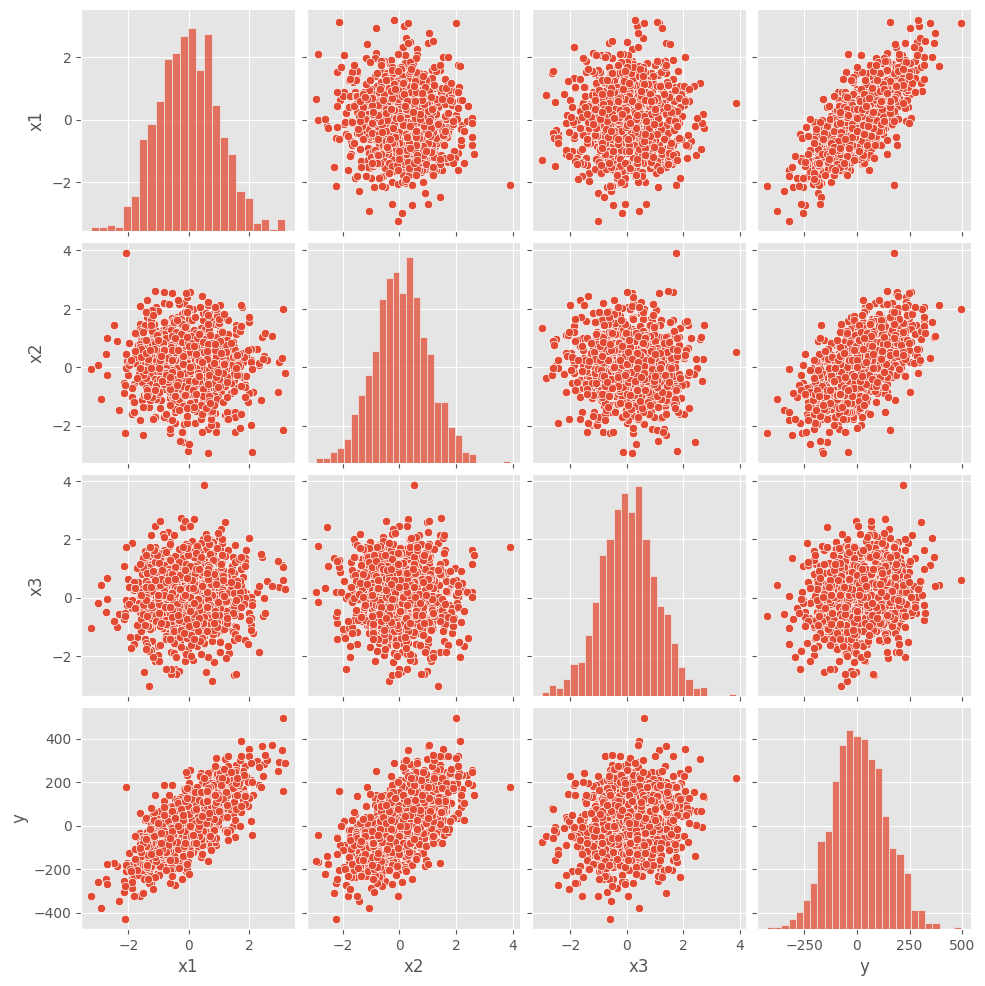

In [94]:
## making linear dataframe using np
x,y=make_regression(n_samples=1000, n_features=3, n_informative=10, n_targets=1, bias=5, noise=20, shuffle=True,  random_state=42)
y=y.reshape(1000,1)
x= pd.DataFrame(x, columns=['x1', 'x2', 'x3'])
y = pd.DataFrame(y, columns=['y'])
df = pd.concat([x, y], axis=1)
sns.pairplot(df)

In [95]:
## (y = independent feature , is linearly dependent on x features )

In [96]:
lr = LinearRegression()
lr.fit(x,y)
print('coeff:{} intercept :{}'.format(lr.coef_, lr.intercept_))


coeff:[[98.44521371 83.63369804 25.89355072]] intercept :[4.90515142]


In [97]:
r2_score(y,lr.predict(x))
## got around 97% accuracy using sklear multipleLinearRegression 

0.9767095399455279

## using gradient Descent from scratch 

<div>
 <img src='Gradient_formula.jpeg'width='500' height='50'>
</div>

In [171]:
class gd:
    def __init__(self, learning_rate, epochs):
        self.m1 = 1
        self.m2 = 1
        self.m3 = 1
        self.c = 0
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self, x, y):
        m = x.shape[0]
        for i in range(self.epochs):
            y_bar = self.m1 * x['x1'] + self.m2 * x['x2'] + self.m3 * x['x3']
            self.m1 = self.m1 - self.lr * (1/m) * np.sum((y_bar - y) * x['x1'])
            self.m2 = self.m2 - self.lr * (1/m) * np.sum((y_bar - y) * x['x2'])
            self.m3 = self.m3 - self.lr * (1/m) * np.sum((y_bar - y) * x['x3'])
            self.c = self.c - self.lr * (1/m) * np.sum(y_bar - y)
        
        total_m = [self.m1, self.m2, self.m3]
        print('coeff{} intercept {}'.format(total_m, self.c))
    
    def predict(self, x):
        return self.m1 * x['x1'] + self.m2 * x['x2'] + self.m3 * x['x3']




In [190]:
multiple_linear= gd(0.0009, 10000)
multiple_linear.fit(x, y)
r2_score(y,multiple_linear.predict(x))
## similar to scikit learn model accuracy 

coeff[98.40520571149631, 83.89833795563527, 26.13622915299889] intercept 49.57206412956245


0.9752848780618637

In [191]:
from sklearn.linear_model import SGDRegressor

In [192]:
sgr=SGDRegressor()

In [193]:
sgr.fit(x,y)

SGDRegressor()

In [197]:
sgr.coef_, sgr.intercept_
## this is official Gradient Descent Regression from scikit learn 
## our intercept is 49 but model intercept is 4.9 it is because internally it uses some scaling technique before fitting the model 

(array([98.56161902, 83.56188039, 25.97782984]), array([4.91563205]))

## Stochastic Gradient Descent 

<div>
 <img src='Stochastic_formula.jpeg'width='500' height='50'>
</div>

In [252]:
class SGD:
    def __init__(self, learning_rate, epochs):
        self.coef= np.ones(x.shape[1]) ## initally all coef 1 
        self.intercept =0 ## initially intercept 0 
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self, x, y):
        for i in range (self.epochs):
            for j in range(x.shape[0]):
                ## now calculate random no 
                ran= np.random.randint(0, x.shape[0])# will give value in range 1000
                y_hat = np.dot(x.loc[i],self.coef)
                intercept_der = -2 *(y.loc[i] -y_hat )
                coef_der= -2 * (y.loc[i]-y_hat)*x.loc[i]
                ## update coef and intercept 

                self.coef = self.coef- self.lr * coef_der
                self.intercept =self.intercept - self.lr * intercept_der 
        
        print('coeff {} intercept {}'.format(self.coef.values ,self.intercept))
        
    
    def predict(self, x):
        
        return np.dot(x,self.coef.values.reshape(3,1))+ self.intercept




In [343]:
sg= SGD(0.00007, 50)

In [344]:
sg.fit(x,y)

coeff [97.97456827 77.72034857 39.50952334] intercept 1.3698737091860622


In [345]:
y_pred= sg.predict(x)
r2_score(y , y_pred)

0.9633527542808865